<h2><b>Decision Tree Classifier</b></h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Replace Sex categorical values wit numeric - Male: 0, Female: 1
data["Sex"].replace({"male": 0, "female": 1}, inplace=True)
data = data[["Pclass", "Fare", "Age", "Sex", "Survived"]]
# Drop NaN values
data.dropna(inplace=True)
data.shape

(714, 5)

In [4]:
# Create feature and target arrays
X = data[["Pclass", "Fare", "Age", "Sex"]]
y = data["Survived"]

In [5]:
# Train the decision tree classificator with random_state=241 for evaluation, Coursera grader purposes
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=241, splitter='best')

In [6]:
# Predict random sets of data
clf.predict([[1, 75.0, 25, 1], [3, 7.98, 24, 0]])

array([1, 0])

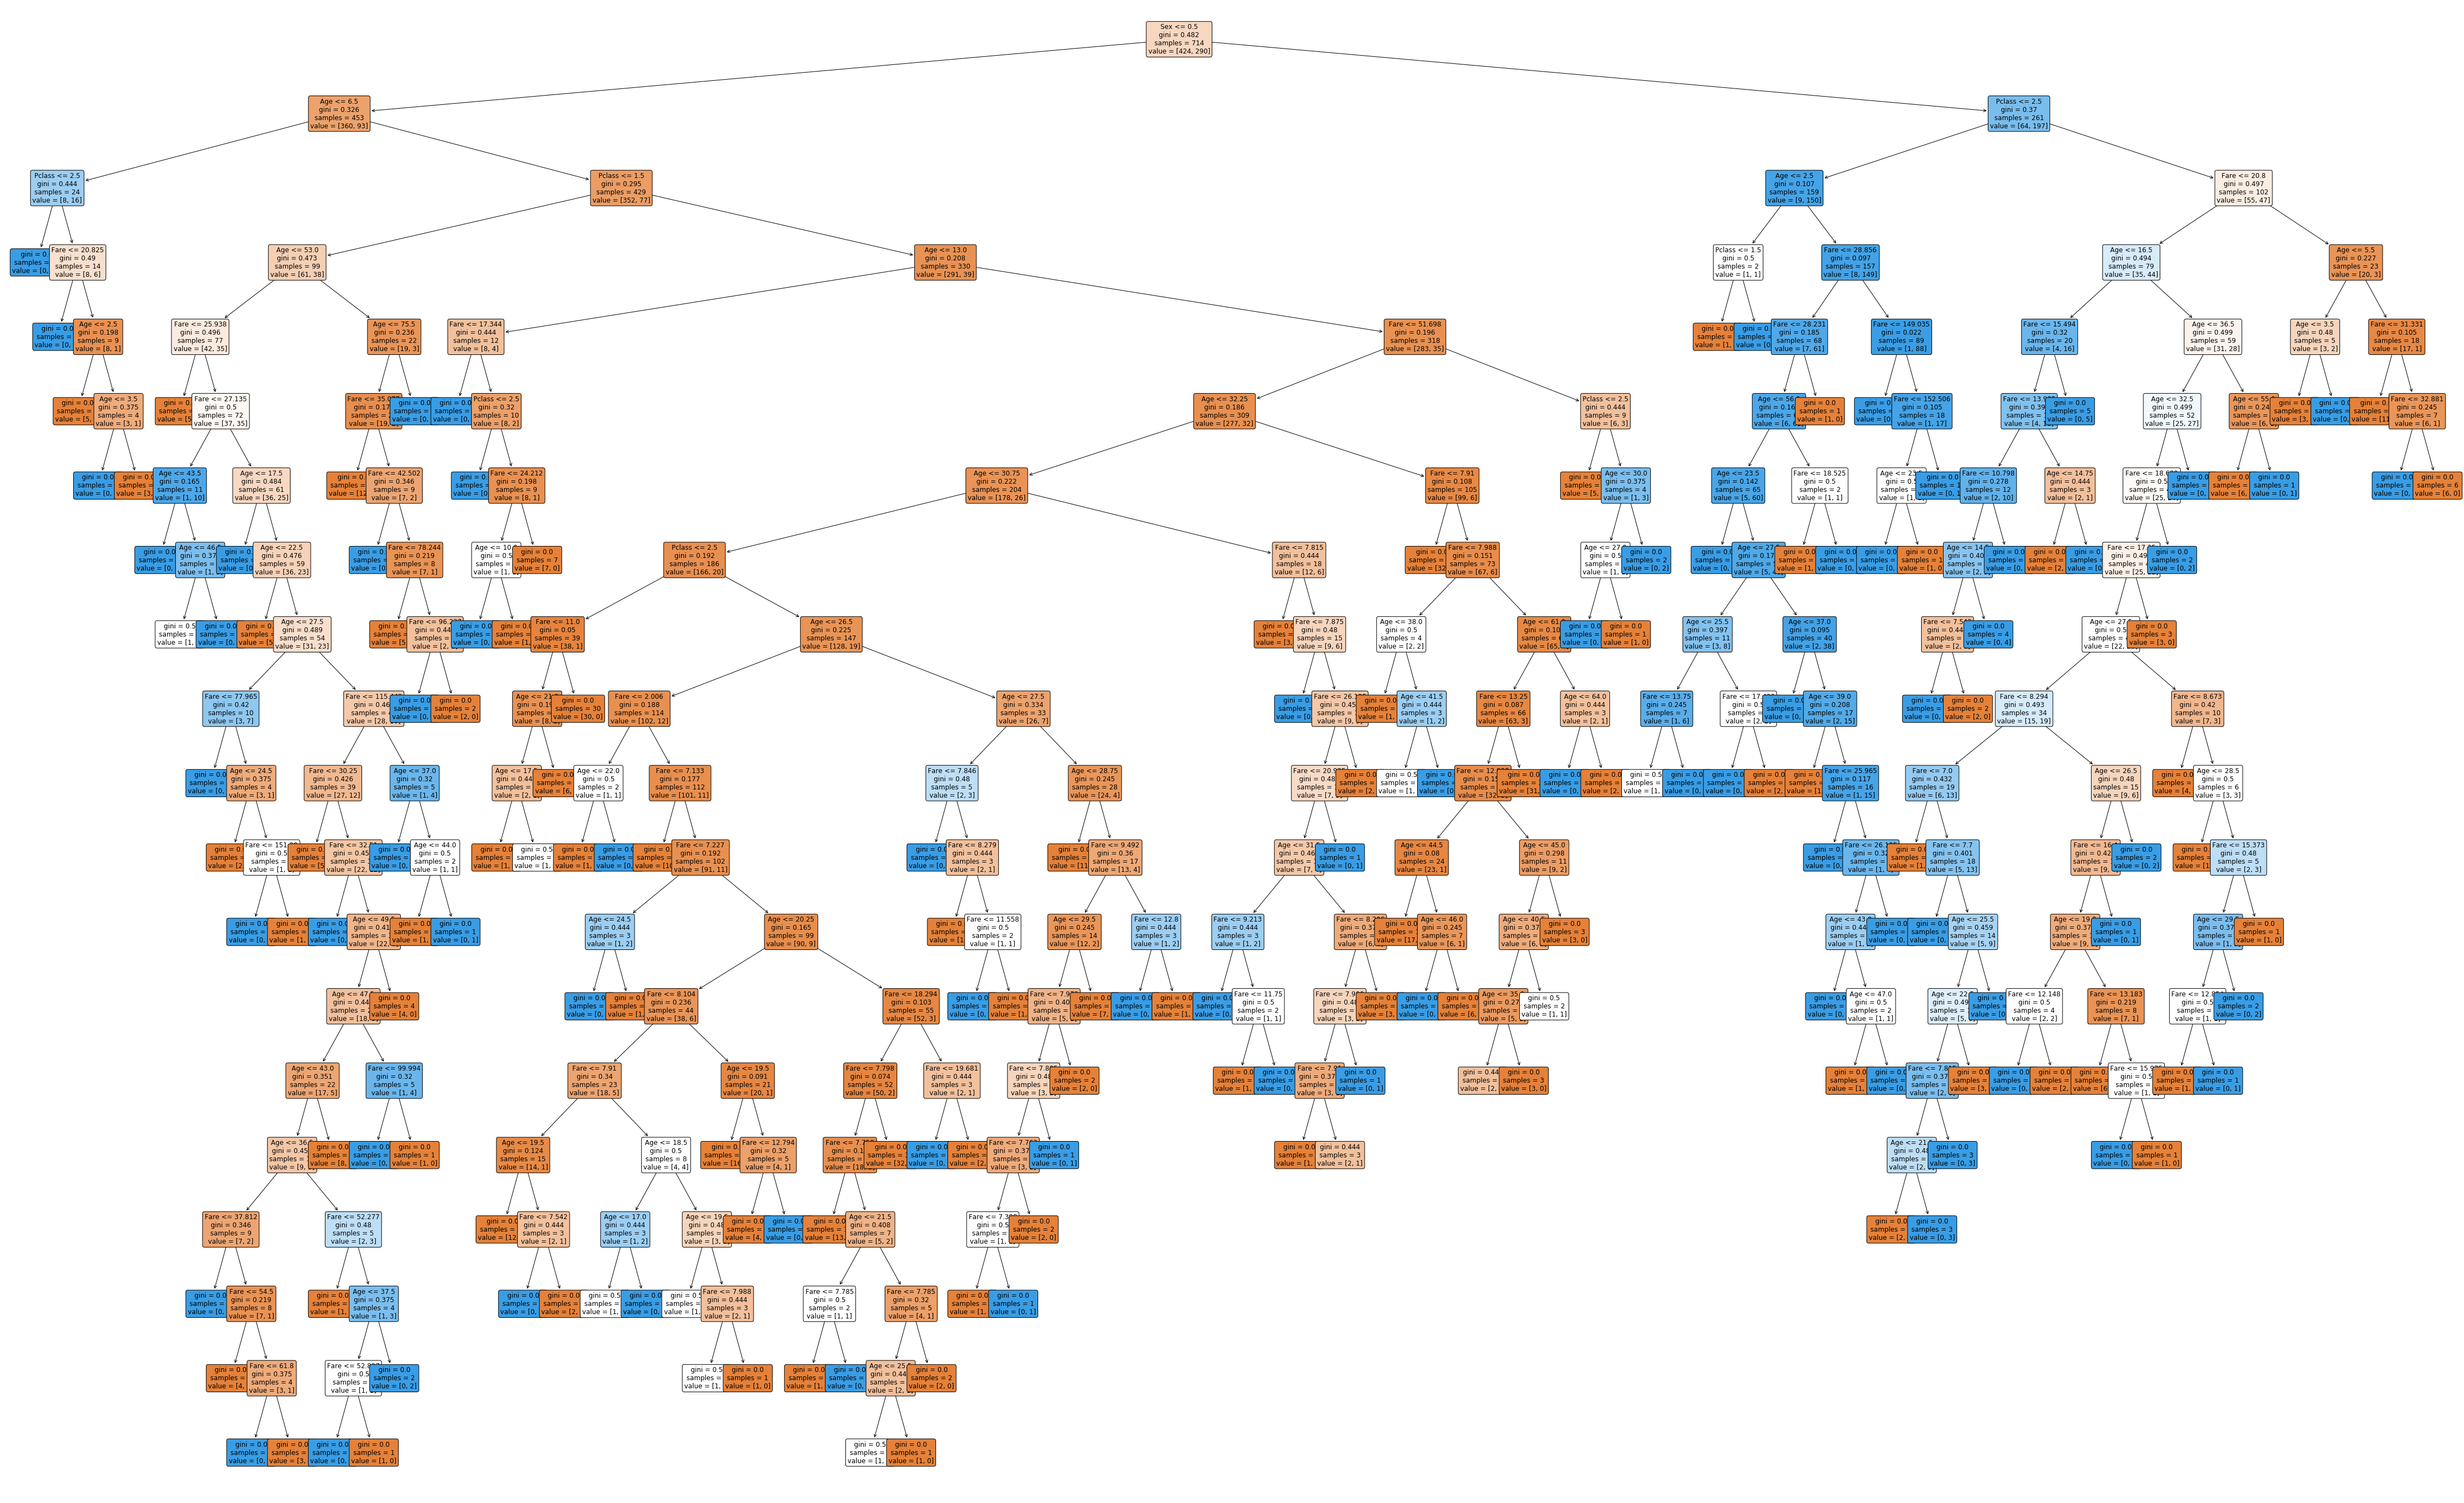

In [7]:
# Plot a decision tree according to Sklearn Classificator
plt.figure(figsize=(80, 50))
a = plot_tree(clf, 
              feature_names=["Pclass", "Fare", "Age", "Sex"],
              filled=True, 
              rounded=True, 
              fontsize=12)

In [9]:
# Calculate dataset feature importances
importances = {feature: clf.feature_importances_[i] for i, feature in enumerate(X.columns)}
importances

{'Pclass': 0.14751816099515025,
 'Fare': 0.2953846784065746,
 'Age': 0.25658494964003575,
 'Sex': 0.3005122109582393}

#### $Fare, Sex:$ These features supposed to be the most informative, since during the Titanic crash, women and first-class passengers, passengers with the most expensive tickets were among the first who were rescued

In [10]:
# Write the answer to an output file
f = open("task02.txt", "w")
f.write("Fare Sex")
f.close()